<a href="https://colab.research.google.com/github/Adrielguza2005/Simulacion/blob/main/Unidad3/Ejercicio3_Distribuci%C3%B3n_LogNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tiempos de espera simulados: [ 9.8052487  12.10771194  8.90444835  6.84918659 10.11152846  8.43593806
 11.42622732  9.0664308  11.55683641  9.6627151   8.1723604  13.56908723
 10.77281919 13.76967566  7.41834741  9.3463207   8.46330371 11.59679304
 13.8457444   8.90625796  7.65668002 10.71137197  9.17512101  7.22771319
  7.8896489   8.6711188  11.03690235 11.73403692 11.130862   10.79840613
  6.83891047 10.04895628  9.2652516   7.76286847 11.66331759 13.50039155
 12.15142763  7.39966571  8.0734729  11.32384899 10.37199521 12.40117143
 11.48896174 10.34820939  8.59181911  8.26688244 12.48961973 15.35186394
  7.42161842  8.94651686]


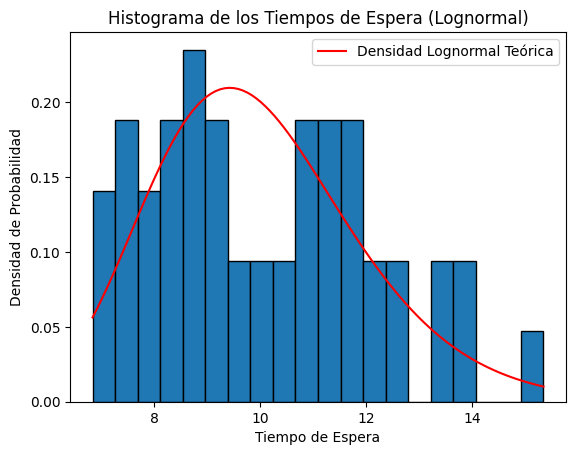

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Definición de parámetros para la distribución lognormal
media_espera = 10  # Promedio del tiempo de espera
desviacion_espera = 2  # Desviación estándar de la espera
clientes = 50  # Cantidad de clientes

# Conversión de parámetros a la distribución normal subyacente
sigma_lognormal = np.sqrt(np.log(1 + (desviacion_espera**2 / media_espera**2)))
mu_lognormal = np.log(media_espera) - 0.5 * sigma_lognormal**2

# Generar valores aleatorios de una distribución uniforme
datos_uniformes = np.random.uniform(0, 1, clientes)

# Aplicar la transformación inversa de la distribución normal estándar
valores_normales = mu_lognormal + sigma_lognormal * stats.norm.ppf(datos_uniformes)

# Obtener los tiempos de espera aplicando la exponenciación
tiempos_espera = np.exp(valores_normales)

# Mostrar los tiempos simulados
print("Tiempos de espera simulados:", tiempos_espera)

# Graficar el histograma de los tiempos generados
plt.hist(tiempos_espera, bins=20, edgecolor='black', density=True)

# Generar la función de densidad teórica para la distribución lognormal
x_vals = np.linspace(min(tiempos_espera), max(tiempos_espera), 100)
densidad_teorica = stats.lognorm.pdf(x_vals, sigma_lognormal, scale=np.exp(mu_lognormal))
plt.plot(x_vals, densidad_teorica, 'r', label='Densidad Lognormal Teórica')

plt.title("Histograma de los Tiempos de Espera (Lognormal)")
plt.xlabel("Tiempo de Espera")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.show()
